In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=(10,6)

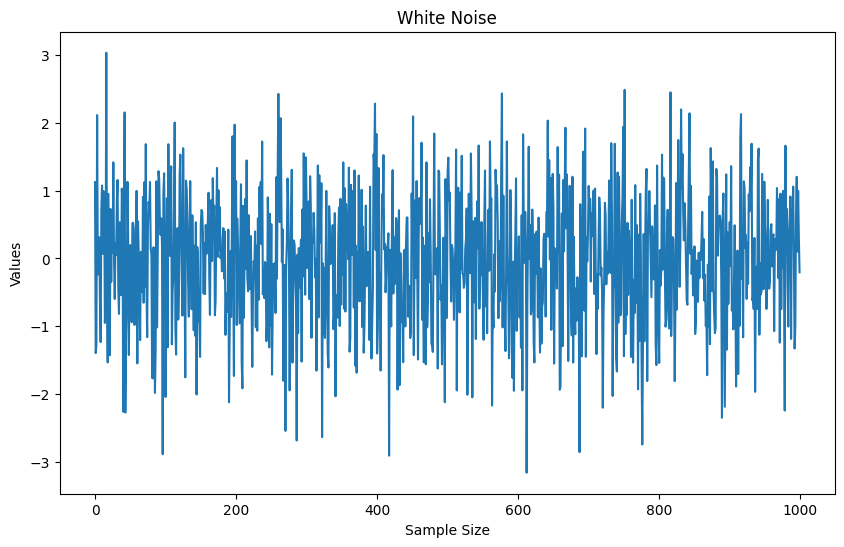

In [2]:
mu=0
std=1
sample_size=1000
wn=np.random.normal(mu,std,sample_size)
plt.plot(wn)
plt.title("White Noise")
plt.xlabel('Sample Size')
plt.ylabel('Values')
plt.show()

#wiite noise stable distribution
#not predictible

# Random Walk

A random walk is another time series model where the current observation is equal to the previous observation with a random up or down movement.

X.=x.-1+ei

In [3]:
def randomwalk(steps):
    x,y=0,0
    time_steps=np.arange(steps+1)
    positions=[y]
    random_directions=['Up','Down']
    for i in range(1,steps+1):
        step=np.random.choice(random_directions)
        if step=='Up':
            y+=1
        elif step=='Down':
            y-=1
        positions.append(y)
    return time_steps, positions  

Text(0, 0.5, 'Value')

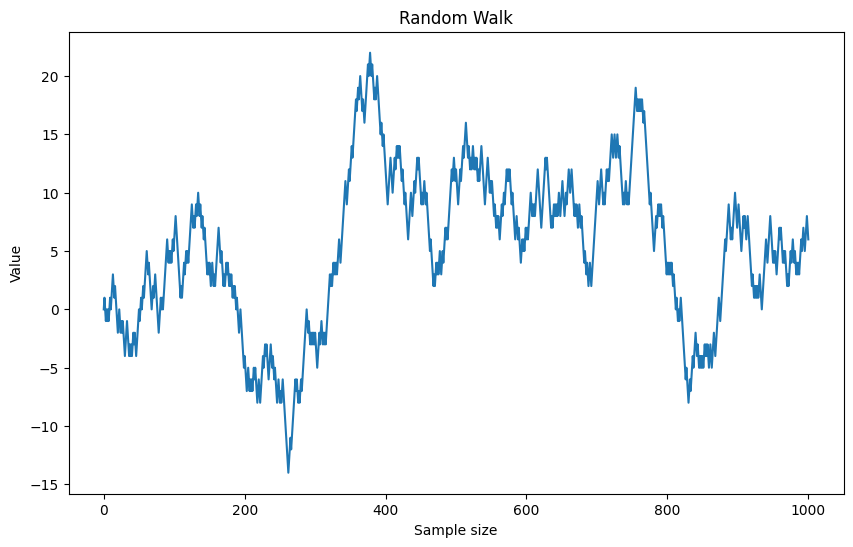

In [4]:
steps=1000
time_steps,positions=randomwalk(steps)
plt.plot(time_steps,positions)
plt.title('Random Walk')
plt.xlabel("Sample size")
plt.ylabel('Value')

# Detecting and Handling with Stationarity


In [5]:
stock='TSLA'
start=datetime.datetime(2021,1,1)
end=datetime.datetime(2023,12,31)
tsla_close=yf.download(stock,start=start,end=end,interval='1d')['Close']


[*********************100%***********************]  1 of 1 completed


In [6]:
tsla_close.head()

Date
2020-12-31    235.223328
2021-01-04    243.256668
2021-01-05    245.036667
2021-01-06    251.993332
2021-01-07    272.013336
Name: Close, dtype: float64

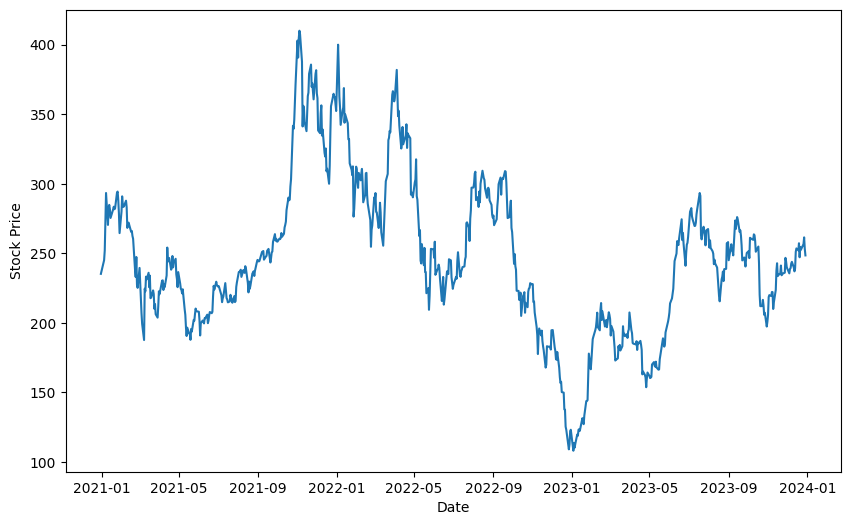

In [7]:
plt.plot(tsla_close)
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

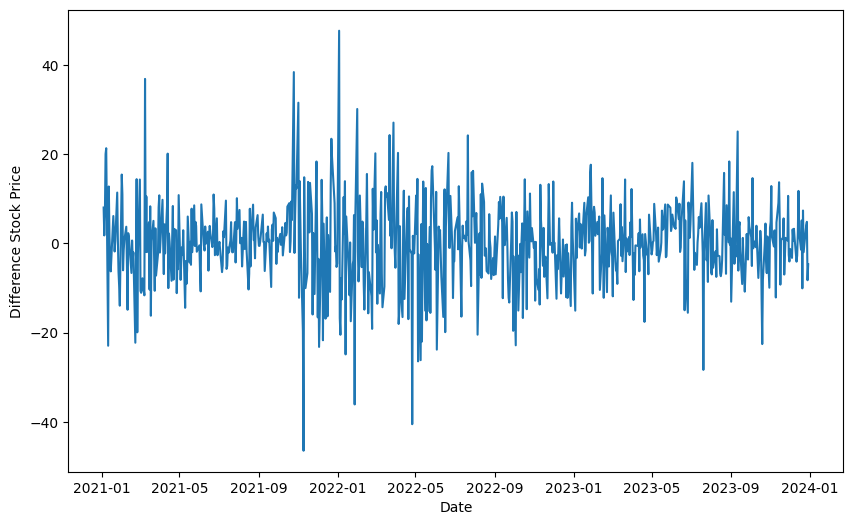

Date
2020-12-31          NaN
2021-01-04     8.033340
2021-01-05     1.779999
2021-01-06     6.956665
2021-01-07    20.020004
                ...    
2023-12-22    -1.960007
2023-12-26     4.069992
2023-12-27     4.830017
2023-12-28    -8.260010
2023-12-29    -4.699997
Name: Close, Length: 754, dtype: float64

In [8]:
diff_tsla=tsla_close.diff( )
plt.plot(diff_tsla)
plt.xlabel('Date')
plt.ylabel('Difference Stock Price')
plt.show()
diff_tsla

In [9]:
from statsmodels.tsa.stattools import adfuller
stat_test=adfuller(tsla_close)
print('Test Statistics is {} and p-value is {}'.
      format(stat_test[0],stat_test[1]))

Test Statistics is -2.7255875227612494 and p-value is 0.06971420213623387


In [10]:
stat_test=adfuller(diff_tsla.dropna())
print('Test Statistics is {} and p-value is {}'.
      format(stat_test[0],stat_test[1]))

Test Statistics is -8.053267574655795 and p-value is 1.7192235805951206e-12


In [11]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
stat,p_value,_,_=sm.tsa.stattools.kpss(tsla_close,regression='ct')
print('p_value is {}'.format(p_value))

p_value is 0.01


In [12]:
stat,p_value,_,_=sm.tsa.stattools.kpss(diff_tsla.dropna(),regression='ct')
print('p_value is {}'.format(p_value))

p_value is 0.1


 # Partial AutoCorrelation Function(PACF)

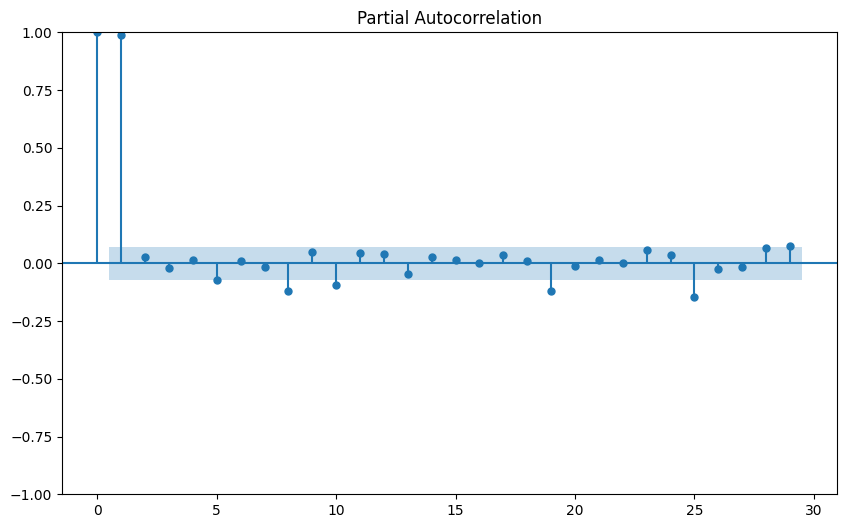

In [13]:
sm.graphics.tsa.plot_pacf(tsla_close);

# Navie Model

In [18]:
train_len=int(len(tsla_close)*0.8)
train=tsla_close[:train_len]
test=tsla_close[train_len:]

In [22]:
predictions=pd.DataFrame()
predictions.index=test.index
predictions['navie_model']=train[train_len-1]


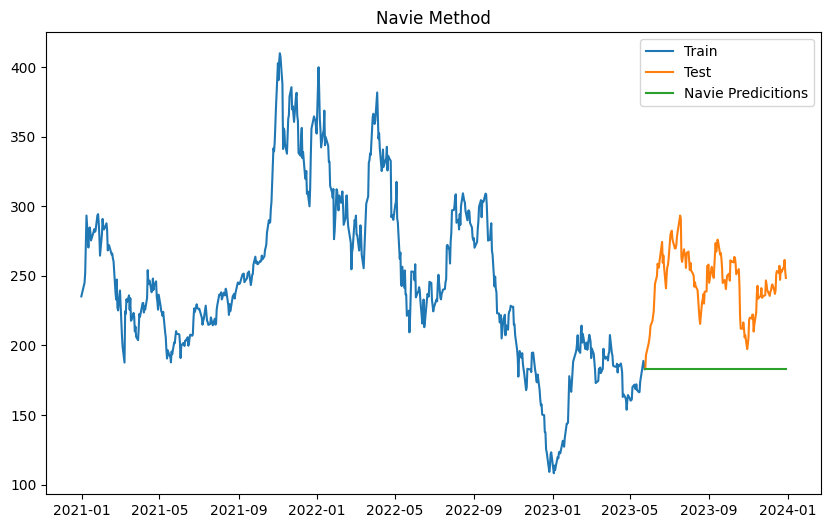

In [30]:
plt.plot(train,label='Train')
plt.plot(test,label='Test')
plt.plot(predictions['navie_model'],label='Navie Predicitions')
plt.legend(loc='best')
plt.title("Navie Method")
plt.show()



# Simple Moving Average Menthod

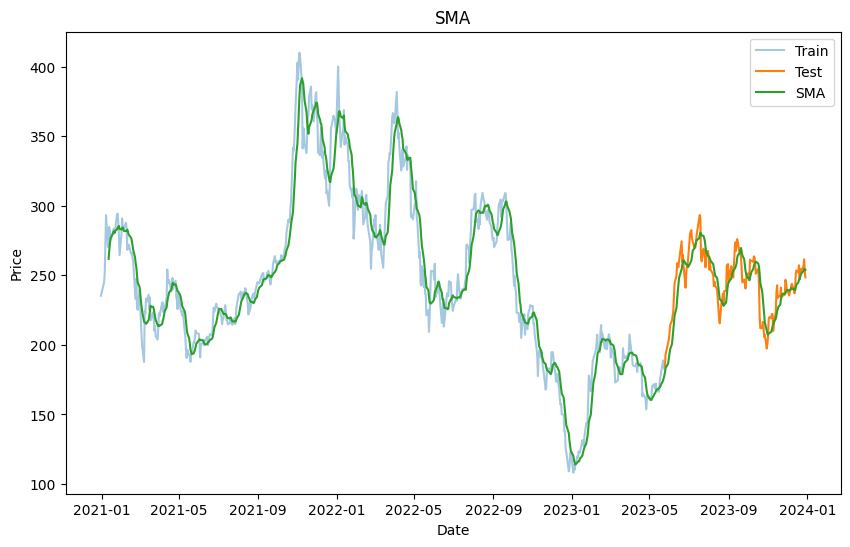

In [35]:

sma=tsla_close.rolling(8).mean()
plt.plot(train.index,train,label='Train',alpha=0.4)
plt.plot(test.index,test,label='Test')
plt.plot(sma.index,sma,label='SMA')
plt.title("SMA")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='best')
plt.show()

In [53]:
from sklearn.metrics import *

In [57]:
sma=sma.dropna()
mae_sma=mean_absolute_error(tsla_close.iloc[7:],sma)
mse_sma=mean_squared_error(tsla_close.iloc[7:],sma)
rmse_sma=np.sqrt(mse_sma)

In [45]:
tsla_close

Date
2020-12-31    235.223328
2021-01-04    243.256668
2021-01-05    245.036667
2021-01-06    251.993332
2021-01-07    272.013336
                 ...    
2023-12-22    252.539993
2023-12-26    256.609985
2023-12-27    261.440002
2023-12-28    253.179993
2023-12-29    248.479996
Name: Close, Length: 754, dtype: float64

In [59]:
sma_pref={'mae_sma':mae_sma,
         'mse_sma':mse_sma,
         'rsme_sma':rmse_sma}
sma_pref=pd.DataFrame([sma_pref])
sma_pref

,mae_sma,mse_sma,rsme_sma
0,10.363349,185.36115,13.61474
